# PROJECT : Data Product with Machine Learning


### Student Name : Mahjabeen Mohiuddin
### Student_Id: 24610507
### Course : Data Science and Innovation



## Topics of the Project:
### 1. Importing Packages from sklearn
### 2. Data Cleaning Process
### 3. Exploratory Data Analysis 
### 4.  Spliting data into train and validation set and tes set
### 5. Baseline Model Performance
### 6. Models 1:  BaseLine Model

## 7. ### . Model Serving Pipeline Process and building Random Forest Regressor model



## GitHub Link : https://github.com/rohanbrit/adv_mla_asgn3.git

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Importing Packages from sklearn

In [1]:
import pandas as pd
import numpy as np

### Loading Data

In [2]:
data1 = pd.read_csv('../data/raw/merged_dataset.csv') 

### Making Copy of original data

In [3]:
df=data1.copy()
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,False,193.99,...,1654577160||1654595760,2022-06-06T22:46:00.000-06:00||2022-06-07T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,False,255.58,...,1654539000||1654561500,2022-06-06T13:10:00.000-05:00||2022-06-06T20:2...,ORD||ATL,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,False,304.78,...,1654547640||1654566000,2022-06-06T13:34:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,False,304.78,...,1654540680||1654566000,2022-06-06T11:38:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,False,304.78,...,1654584360||1654629300,2022-06-06T23:46:00.000-07:00||2022-06-07T15:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,False,274.20,...,1652194800||1652219580,2022-05-10T11:00:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10260||7980,1104||485,coach||coach
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,False,274.20,...,1652189520||1652219580,2022-05-10T09:32:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,False,289.61,...,1652204580||1652219580,2022-05-10T13:43:00.000-04:00||2022-05-10T17:5...,JFK||DTW,MIA||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A320||Embraer 190,10320||7980,1104||485,coach||coach
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,True,328.60,...,1652239260,2022-05-10T23:21:00.000-04:00,DTW,MIA,American Airlines,AA,Embraer 175,11580,1153,coach


## 2. Data Cleaning Process

### Analysing the column list

In [4]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

### Analysing the features data types 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

### Analysing the summary statistics of dataframe

In [6]:
df.describe()

,totalFare,totalTravelDistance
count,1.352000e+07,1.256038e+07
mean,3.737535e+02,1.569619e+03
std,2.075496e+02,8.414888e+02
min,2.397000e+01,9.700000e+01
25%,2.235800e+02,8.620000e+02
50%,3.446000e+02,1.392000e+03
75%,4.876000e+02,2.376000e+03
max,8.260610e+03,4.430000e+03


### Assessing the number of  nan values and its columns

In [7]:
df.isna().sum().sum()

1349280

In [8]:
df.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

### Assing the duplicate values

In [9]:
total_duplicates = df.duplicated().sum()
print("Total duplicated rows in dataframe:", total_duplicates)

Total duplicated rows in dataframe: 0


### Maping isNonStop column

In [5]:
val_1 = df["isNonStop"].unique()[0]
val_2 = df["isNonStop"].unique()[1]
df["isNonStop"] = df["isNonStop"].map({val_1 :0, val_2 :1})

### Splitting the segment raw time

In [6]:
# Assuming 'segmentsDepartureTimeRaw' is the column you want to split
timestamps = df['segmentsDepartureTimeRaw'].str.split('|', expand=True)

# Generate column names based on the number of columns in timestamps
new_column_names = [f'timestamp_{i + 1}' for i in range(timestamps.shape[1])]

# Assign the resulting DataFrame to new columns, handling NaT values
df[new_column_names] = timestamps.apply(lambda x: pd.to_datetime(x, errors='coerce'))

# Drop the original column if needed
df = df.drop(['segmentsDepartureTimeRaw'], axis=1)

### Extracting date, hour and minute data from the timestamp column obtained from segmentsDepartureTimeRaw'

In [7]:
df['timestamp_1'] = pd.to_datetime(df['timestamp_1'], errors='coerce')

# Check if the conversion was successful
if 'timestamp_1' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['timestamp_1']):
    df['Departure_Date'] = df['timestamp_1'].dt.date
    df['Departure_Hour'] = df['timestamp_1'].dt.hour  # Extract hour
    df['Departure_Minute'] = df['timestamp_1'].dt.minute  # Extract minute
    
else:
    print("Conversion to datetime failed. Please check the column name and data.")

### Splitting the segment airline code column

In [8]:

# Spliting the 'segmentsAirlineCode' column into separate columns
AirlineCode = df['segmentsAirlineCode'].str.split('|', n=-1, expand=True)
num_new_columns = AirlineCode.shape[1]

# Creating column names based on the number of new columns
new_column_names = [f'segmentsAirlineCode_{i + 1}' for i in range(num_new_columns)]

# Renaming the columns in split_columns
AirlineCode.columns = new_column_names

# Ensuring split_columns has the same number of rows as df1
AirlineCode = AirlineCode.reindex(df.index)

# Assigning the split columns back to the DataFrame
df1 = pd.concat([df, AirlineCode], axis=1)

# Viewing the updated DataFrame
df1

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,Departure_Date,Departure_Hour,Departure_Minute,segmentsAirlineCode_1,segmentsAirlineCode_2,segmentsAirlineCode_3,segmentsAirlineCode_4,segmentsAirlineCode_5,segmentsAirlineCode_6,segmentsAirlineCode_7
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,0,193.99,...,2022-06-06,19.0,14.0,F9,,F9,None,None,None,None
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,0,255.58,...,2022-06-06,7.0,0.0,NK,,NK,None,None,None,None
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,0,304.78,...,2022-06-06,12.0,0.0,NK,,NK,None,None,None,None
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,0,304.78,...,2022-06-06,10.0,5.0,NK,,NK,None,None,None,None
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,0,304.78,...,2022-06-06,22.0,10.0,NK,,NK,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,0,274.20,...,NaN,NaN,NaN,B6,,B6,None,None,None,None
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,0,274.20,...,NaN,NaN,NaN,B6,,B6,None,None,None,None
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,0,289.61,...,NaN,NaN,NaN,B6,,B6,None,None,None,None
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,1,328.60,...,NaN,NaN,NaN,AA,None,None,None,None,None,None


### Renaming the columns

In [9]:
new_column_names1 = {
    'sstartingAirport':'Origin_Airport',
    'destinationAirport':'Destination_Airport',
    'segmentsAirlineCode_1':'segmentsAirlineCode_stop_1',
    'segmentsAirlineCode_3':'segmentsAirlineCode_stop_2',
    'segmentsAirlineCode_5': 'segmentsAirlineCode_stop_3',
    'startingAirport': 'Origin_Airport',
    'destinationAirport':'Destination_Airport'
}

# Use the rename method to rename the columns
df1= df1.rename(columns=new_column_names1)
df1

,legId,searchDate,flightDate,Origin_Airport,Destination_Airport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,Departure_Date,Departure_Hour,Departure_Minute,segmentsAirlineCode_stop_1,segmentsAirlineCode_2,segmentsAirlineCode_stop_2,segmentsAirlineCode_4,segmentsAirlineCode_stop_3,segmentsAirlineCode_6,segmentsAirlineCode_7
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,0,193.99,...,2022-06-06,19.0,14.0,F9,,F9,None,None,None,None
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,0,255.58,...,2022-06-06,7.0,0.0,NK,,NK,None,None,None,None
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,0,304.78,...,2022-06-06,12.0,0.0,NK,,NK,None,None,None,None
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,0,304.78,...,2022-06-06,10.0,5.0,NK,,NK,None,None,None,None
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,0,304.78,...,2022-06-06,22.0,10.0,NK,,NK,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,0,274.20,...,NaT,NaN,NaN,B6,,B6,None,None,None,None
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,0,274.20,...,NaT,NaN,NaN,B6,,B6,None,None,None,None
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,0,289.61,...,NaT,NaN,NaN,B6,,B6,None,None,None,None
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,1,328.60,...,NaT,NaN,NaN,AA,None,None,None,None,None,None


### Computing for to extract number of layovers

In [10]:
def count_segments(row):
    layover = 0
    if pd.notna(row['segmentsAirlineCode_stop_1']):
        str_value = str(row['segmentsAirlineCode_stop_1'])
        if any(c.isdigit() for c in str_value):
            layover += 1
    if pd.notna(row['segmentsAirlineCode_stop_2']):
        str_value = str(row['segmentsAirlineCode_stop_2'])
        if any(c.isdigit() for c in str_value):
            layover += 1
    if pd.notna(row['segmentsAirlineCode_stop_3']):
        str_value = str(row['segmentsAirlineCode_stop_3'])
        if any(c.isdigit() for c in str_value):
            layover += 1
    return layover

# Apply the custom function to create a new 'layover' column
df1['layover'] = df1.apply(count_segments, axis=1)


In [11]:
df1

,legId,searchDate,flightDate,Origin_Airport,Destination_Airport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,Departure_Hour,Departure_Minute,segmentsAirlineCode_stop_1,segmentsAirlineCode_2,segmentsAirlineCode_stop_2,segmentsAirlineCode_4,segmentsAirlineCode_stop_3,segmentsAirlineCode_6,segmentsAirlineCode_7,layover
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,0,193.99,...,19.0,14.0,F9,,F9,None,None,None,None,2
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,0,255.58,...,7.0,0.0,NK,,NK,None,None,None,None,0
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,0,304.78,...,12.0,0.0,NK,,NK,None,None,None,None,0
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,0,304.78,...,10.0,5.0,NK,,NK,None,None,None,None,0
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,0,304.78,...,22.0,10.0,NK,,NK,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,0,274.20,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,0,274.20,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,0,289.61,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,1,328.60,...,NaN,NaN,AA,None,None,None,None,None,None,0


In [13]:
df1

,legId,searchDate,flightDate,Origin_Airport,Destination_Airport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,Departure_Hour,Departure_Minute,segmentsAirlineCode_stop_1,segmentsAirlineCode_2,segmentsAirlineCode_stop_2,segmentsAirlineCode_4,segmentsAirlineCode_stop_3,segmentsAirlineCode_6,segmentsAirlineCode_7,layover
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,0,193.99,...,19.0,14.0,F9,,F9,None,None,None,None,2
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,0,255.58,...,7.0,0.0,NK,,NK,None,None,None,None,0
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,0,304.78,...,12.0,0.0,NK,,NK,None,None,None,None,0
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,0,304.78,...,10.0,5.0,NK,,NK,None,None,None,None,0
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,0,304.78,...,22.0,10.0,NK,,NK,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,ed1261ce88c4f1ef89b6bee2cffc0d93,2022-04-27,2022-05-10,MIA,DTW,PT9H44M,False,False,0,274.20,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519995,650c4f263b2ecb69b1df5b2976b758de,2022-04-27,2022-05-10,MIA,DTW,PT11H13M,False,False,0,274.20,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519996,71121e298e82dee40e77aa26acd822e6,2022-04-27,2022-05-10,MIA,DTW,PT7H2M,False,False,0,289.61,...,NaN,NaN,B6,,B6,None,None,None,None,2
13519997,0f666eda8ad310c5717a9dca3e8af8b2,2022-04-27,2022-05-10,MIA,DTW,PT3H13M,False,False,1,328.60,...,NaN,NaN,AA,None,None,None,None,None,None,0


In [14]:
df1['layover'].unique()

array([2, 0, 1, 3])

### Dropping unrequired columns

### Making a cleaned dataset

In [18]:
df2= df1.drop_duplicates(subset=['legId'])
df2

,legId,searchDate,flightDate,Origin_Airport,Destination_Airport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,Departure_Hour,Departure_Minute,segmentsAirlineCode_stop_1,segmentsAirlineCode_2,segmentsAirlineCode_stop_2,segmentsAirlineCode_4,segmentsAirlineCode_stop_3,segmentsAirlineCode_6,segmentsAirlineCode_7,layover
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,0,193.99,...,19.0,14.0,F9,,F9,None,None,None,None,2
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,0,255.58,...,7.0,0.0,NK,,NK,None,None,None,None,0
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,0,304.78,...,12.0,0.0,NK,,NK,None,None,None,None,0
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,0,304.78,...,10.0,5.0,NK,,NK,None,None,None,None,0
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,0,304.78,...,22.0,10.0,NK,,NK,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519696,99b73a9a006e5bec746bbd48b1969c72,2022-04-27,2022-05-09,MIA,SFO,PT14H37M,False,False,0,1061.60,...,8.0,20.0,AA,,AA,,AA,None,None,0
13519697,e097a8c75f6af4fca714ea473a28f71b,2022-04-27,2022-05-09,MIA,SFO,PT8H23M,False,False,0,1198.60,...,NaN,NaN,DL,,DL,None,None,None,None,0
13519698,27b304d53d93a42f4bd71ca1a817e342,2022-04-27,2022-05-09,MIA,SFO,PT11H2M,False,False,0,1198.60,...,NaN,NaN,DL,,DL,None,None,None,None,0
13519710,7096779027c22fdef2c2032a221cd344,2022-04-27,2022-05-10,MIA,ATL,PT12H46M,True,False,0,115.20,...,NaN,NaN,UA,,UA,None,None,None,None,0


## Saving cleaned data into the csv

In [21]:
df3= pd.read_csv('../data/raw/Final_cleaned_Dataset6.csv')

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_44777/4087552225.py:1: DtypeWarning: Columns (29,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df3= pd.read_csv('../data/raw/Final_cleaned_Dataset6.csv')


In [122]:
df3=pd.read_csv('../data/raw/Final_cleaned_Dataset6.csv')

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_44777/2411149340.py:1: DtypeWarning: Columns (29,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('../data/raw/Final_cleaned_Dataset6.csv')


In [123]:
#converting flighDate into datetime datatype:
df3['flightDate'] = pd.to_datetime(df3['flightDate'])

#Extracting and creating new features out of the date variable
df3['Departure_Year'] = df3['flightDate'].dt.year
df3['Departure_Month'] = df3['flightDate'].dt.month
df3['Departure_Day'] = df3['flightDate'].dt.day


In [124]:
df4= df3.drop(['flightDate','legId','totalTravelDistance'],axis=1)


In [125]:
df4.columns

Index(['Unnamed: 0', 'searchDate', 'Origin_Airport', 'Destination_Airport',
       'travelDuration', 'isBasicEconomy', 'isRefundable', 'isNonStop',
       'totalFare', 'segmentsDepartureTimeEpochSeconds',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'timestamp_1', 'timestamp_2',
       'timestamp_3', 'timestamp_4', 'timestamp_5', 'timestamp_6',
       'timestamp_7', 'Departure_Date', 'Departure_Hour', 'Departure_Minute',
       'segmentsAirlineCode_stop_1', 'segmentsAirlineCode_2',
       'segmentsAirlineCode_stop_2', 'segmentsAirlineCode_4',
       'segmentsAirlineCode_stop_3', 'segmentsAirlineCode_6',
       'segmentsAirlineCode_7', 'layover', 'Departure_Year', 'Departure_Month',
       'Departure_Day'],
      dtype='object')

### Selecting only required columns

In [126]:
df5 = df4[['Origin_Airport', 'Destination_Airport','isNonStop','layover', 'totalFare','Departure_Day','Departure_Month','Departure_Year', 'Departure_Hour', 'Departure_Minute','segmentsCabinCode']]

In [127]:
df5.to_csv('../data/raw/Final_cleaned_Dataset7.csv')

In [128]:
df5.isna().sum()

Origin_Airport               0
Destination_Airport          0
isNonStop                    0
layover                      0
totalFare                    0
Departure_Day                0
Departure_Month              0
Departure_Year               0
Departure_Hour         1352739
Departure_Minute       1352739
segmentsCabinCode            0
dtype: int64

In [129]:
df5['Departure_Hour'] = df5['Departure_Hour'].fillna(0.0)
df5['Departure_Minute'] = df5['Departure_Minute'].fillna(0.0)

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_44777/438351620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Departure_Hour'] = df5['Departure_Hour'].fillna(0.0)
/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_44777/438351620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Departure_Minute'] = df5['Departure_Minute'].fillna(0.0)


## 3. Exploratory Data Analysis 

#### Visualization on Number of Flights on Origin Airport

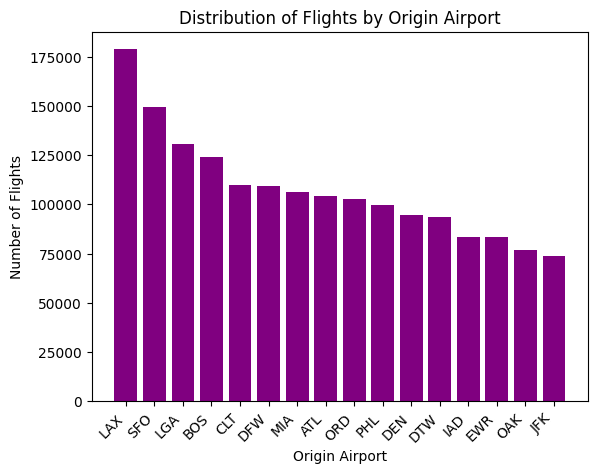

In [130]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
origin_counts = df5['Origin_Airport'].value_counts()

# Create a bar plot with a specific color
plt.bar(origin_counts.index, origin_counts.values, color='purple')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' ensures that labels are right-aligned for better visibility

plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Origin Airport')

plt.show()


#### Visualization on Number of Flights on Destination Airport

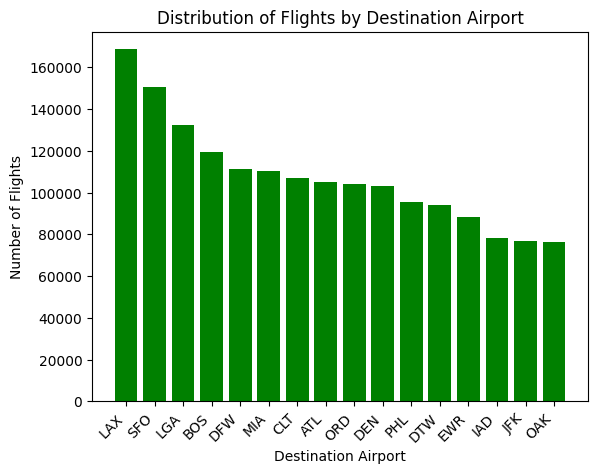

In [131]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
destination_counts = df5['Destination_Airport'].value_counts()

# Create a bar plot with a specific color
plt.bar(destination_counts.index, destination_counts.values, color='green')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' ensures that labels are right-aligned for better visibility

plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Destination Airport')

plt.show()


#### Visualization on Number of layovers

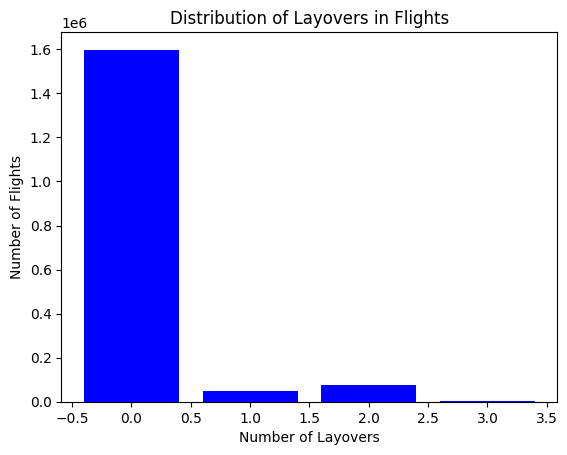

In [132]:


# Assuming your DataFrame is named df2
layover_counts = df5['layover'].value_counts()

# Create a bar plot
plt.bar(layover_counts.index, layover_counts.values, color='blue')

plt.xlabel('Number of Layovers')
plt.ylabel('Number of Flights')
plt.title('Distribution of Layovers in Flights')

plt.show()


### Visualization on fare based on layovers, Total fare of layover 0 is high, and layover is at the 2nd higest position

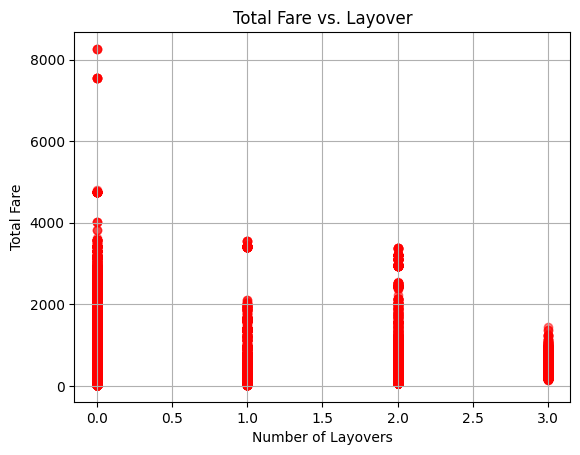

In [133]:

plt.scatter(df5['layover'], df5['totalFare'], alpha=0.5, color='red')
plt.title('Total Fare vs. Layover')
plt.xlabel('Number of Layovers')
plt.ylabel('Total Fare')
plt.grid(True)
plt.show()


### Splitting features and target set

In [134]:
X = df5.drop('totalFare', axis=1)  # X should contain the feature columns
y = df5['totalFare']  # y should be the target variable


In [135]:
X 

,Origin_Airport,Destination_Airport,isNonStop,layover,Departure_Day,Departure_Month,Departure_Year,Departure_Hour,Departure_Minute,segmentsCabinCode
0,OAK,ATL,0,2,6,6,2022,19.0,14.0,coach||coach
1,OAK,ATL,0,0,6,6,2022,7.0,0.0,coach||coach
2,OAK,ATL,0,0,6,6,2022,12.0,0.0,coach||coach
3,OAK,ATL,0,0,6,6,2022,10.0,5.0,coach||coach
4,OAK,ATL,0,0,6,6,2022,22.0,10.0,coach||coach
...,...,...,...,...,...,...,...,...,...,...
1721513,MIA,SFO,0,0,9,5,2022,8.0,20.0,coach||coach||coach
1721514,MIA,SFO,0,0,9,5,2022,0.0,0.0,coach||coach
1721515,MIA,SFO,0,0,9,5,2022,0.0,0.0,coach||coach
1721516,MIA,ATL,0,0,10,5,2022,0.0,0.0,coach||coach


## 4.  Spliting data into train and validation set and tes set

In [136]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

## 5. Baseline Model Performance

In [137]:
pred_value = y_train.mean()
y_base = np.full(len(y_train), pred_value)


In [138]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print("The mse score of baseline model is:",mse(y_base, y_train, squared=False))
print("The mae score of baseline model is:",mae(y_base, y_train))

The mse score of baseline model is: 253.24016915605014
The mae score of baseline model is: 174.3187958362247


## 6. Model Serving (Pipeline Process) and building Random Forest Regressor model

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder 
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor


In [140]:
num_cols = ['isNonStop', 'layover', 'Departure_Hour', 'Departure_Minute','Departure_Day','Departure_Month','Departure_Year']
cat_cols = ['Origin_Airport', 'Destination_Airport', 'segmentsCabinCode']

In [141]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

### Assigining categorical columns

In [142]:
Origin_Airport ='Origin_Airport'
Destination_Airport='Destination_Airport'
segmentsCabinCode ='segmentsCabinCode'


### Initiating pipeline for Origin_Airport categorical column and encoding using TargetEncoder

In [143]:
#transforming categorical columns using cat_transformer
Origin_Airport_transformer = Pipeline(
    steps=[
        ('target_encoder', TargetEncoder())
    ]
)

### Initiating pipeline for Destination_Airport categorical column and encoding using TargetEncoder

In [144]:
Destination_Airport_transformer = Pipeline(
    steps=[
        ('target_encoder', TargetEncoder())
    ]
)

### Initiating pipeline for SegmentCabinCode categorical column and encoding using TargetEncoder

In [145]:
segmentsCabinCode_transformer = Pipeline(
    steps=[
        ('target_encoder', TargetEncoder())
    ]
)

### Ingesting numerical columns and categorical columns into the Column Transformer

In [146]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('Origin_Airport',Origin_Airport_transformer,[Origin_Airport]),
        ('Destination_Airport',Destination_Airport_transformer,[Destination_Airport]),
        ('segmentsCabinCode',segmentsCabinCode_transformer,[segmentsCabinCode]),
      ],
    remainder='drop'
)

In [147]:
dump(preprocessor, 'preprocessor_pipe1.joblib')

['preprocessor_pipe1.joblib']

### Creating a Pipeline for preprocessor and for Random Forest Regressor

In [148]:
rfr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rbr', RandomForestRegressor(n_estimators=100,min_samples_split=2, max_depth=2,random_state=42))
         
    ]
)    

### Fitting the Model into the pipeline

In [149]:
#fitting the pipeline
rfr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['isNonStop', 'layover',
                                                   'Departure_Hour',
                                                   'Departure_Minute',
                                                   'Departure_Day',
                                                   'Departure_Month',
                                                   'Departure_Year']),
                                                 ('Origin_Airport',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['Origin_Airport']),
                                                 ('Destination_Airport',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['Destination_Airport']),
                                                 ('segmentsCabinCode',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['segmentsCabinCode'])])),
                ('rbr', RandomForestRegressor(max_depth=2, random_state=42))])

### Prediction on the train set

In [150]:
#predicting y_train
y_train_preds = rfr_pipe.predict(X_train)

### Printing metrics mse and mae scores for train set

In [151]:
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 212.2357755752187
The mean absolute error for train set is:  151.34376002647525


### Prediction on the validation set

In [152]:

y_val_preds = rfr_pipe.predict(X_val)

### Printing metrics mse and mae scores for validation set

In [153]:

print('The mean squared error of validation set is : ',mse(y_val, y_val_preds, squared=False))
print('The mean absoulte error of validation set is: ',mae(y_val, y_val_preds)) 

The mean squared error of validation set is :  214.22372577213747
The mean absoulte error of validation set is:  151.81166417656698


### Evaluating the test set and Printing metrics mse and mae scores for test set

In [154]:
y_test_preds = rfr_pipe.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))  

The mean squared error of test set is : 212.75411016413557
The mean absoulte error of test set is:  151.29873049009962


### Saving model into the joblib

In [155]:
#saving the model:
from joblib import dump
dump(rfr_pipe, '../models/rfr_pipeline_model3.joblib')